# <font color='Blue'>Deep Learning - Multi-Label Classification - I</font>

# <font color='Blue'>Classification</font>

Multi-label classification involves predicting zero or more class labels.

Unlike normal classification tasks where class labels are mutually exclusive, multi-label classification requires specialized machine learning algorithms that support predicting multiple mutually non-exclusive classes or “labels.”

## <font color='Blue'>Learning Objectives</font>
  1. Apply Deep Learning to a Multi-Label Classification Problem

## <font color='Blue'>Importing Libraries</font>

In [20]:
import keras
keras.__version__

'2.3.1'

In [21]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [22]:
np.set_printoptions(suppress=True)

### <font color='Blue'>1.0 Dataset </font>

In [23]:
from sklearn.datasets import make_multilabel_classification

In [24]:
X, Y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
print(X.shape, Y.shape)

(1000, 10) (1000, 3)


In [25]:
for i in range(10):
    print(X[i], Y[i])

[ 3.  3.  6.  7.  8.  2. 11. 11.  1.  3.] [1 1 0]
[7. 6. 4. 4. 6. 8. 3. 4. 6. 4.] [0 0 0]
[ 5.  5. 13.  7.  6.  3.  6. 11.  4.  2.] [1 1 0]
[1. 1. 5. 5. 7. 3. 4. 6. 4. 4.] [1 1 1]
[ 4.  2.  3. 13.  7.  2.  4. 12.  1.  7.] [0 1 0]
[ 4.  3.  3.  2.  5.  2.  3.  7.  2. 10.] [0 0 0]
[ 3.  3.  3. 11.  6.  3.  4. 14.  1.  3.] [0 1 0]
[ 2.  1.  7.  8.  4.  5. 10.  4.  6.  6.] [1 1 1]
[ 5.  1.  9.  5.  3.  4. 11.  8.  1.  8.] [1 1 1]
[ 2. 11.  7.  6.  2.  2.  9. 11.  9.  3.] [1 1 1]


### <font color='Blue'>What do infer from above data ?</font>

### <font color='Blue'>1.2 Splitting into Train and Validation Sets </font>

In [26]:
train_data, test_data, train_targets, test_targets = train_test_split( X , Y, train_size = 0.7, random_state = 42 )

### <font color='Blue'>1.3 Data Normalization </font>

In [27]:
mean = train_data.mean(axis=0)
std  = train_data.std(axis=0)

train_data = train_data - mean
train_data = train_data/std

test_data = test_data - mean
test_data = test_data/std

### <font color='Blue'>1.4 Building (Defining our Network) </font>

### <font color='Blue'>How should we approach this ?</font>

<img src="Activation Function Last Layer.jpg" width=800 height = 600>   

In [28]:
from keras import models
from keras import layers

In [29]:
from keras import backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',
                           input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Define the Architecture such that

    1.Number of nodes in the output layer matches the number of labels.
    2.Sigmoid activation for each node in the output layer.
    3.Binary cross-entropy loss function.

### <font color='Blue'>1.8 Fitting our Model </font>

In [30]:
hist = model.fit(train_data, train_targets,
                             epochs=100,
                             batch_size=32,verbose=2,
                             validation_data=(test_data, test_targets))

Train on 700 samples, validate on 300 samples
Epoch 1/100
 - 1s - loss: 0.6293 - accuracy: 0.6438 - val_loss: 0.5904 - val_accuracy: 0.6778
Epoch 2/100
 - 0s - loss: 0.5664 - accuracy: 0.7267 - val_loss: 0.5443 - val_accuracy: 0.7256
Epoch 3/100
 - 0s - loss: 0.5194 - accuracy: 0.7700 - val_loss: 0.5076 - val_accuracy: 0.7644
Epoch 4/100
 - 0s - loss: 0.4809 - accuracy: 0.7976 - val_loss: 0.4793 - val_accuracy: 0.7778
Epoch 5/100
 - 0s - loss: 0.4490 - accuracy: 0.8114 - val_loss: 0.4560 - val_accuracy: 0.7889
Epoch 6/100
 - 0s - loss: 0.4218 - accuracy: 0.8271 - val_loss: 0.4371 - val_accuracy: 0.7956
Epoch 7/100
 - 0s - loss: 0.3984 - accuracy: 0.8448 - val_loss: 0.4215 - val_accuracy: 0.8000
Epoch 8/100
 - 0s - loss: 0.3786 - accuracy: 0.8495 - val_loss: 0.4082 - val_accuracy: 0.8089
Epoch 9/100
 - 0s - loss: 0.3615 - accuracy: 0.8538 - val_loss: 0.3956 - val_accuracy: 0.8078
Epoch 10/100
 - 0s - loss: 0.3465 - accuracy: 0.8571 - val_loss: 0.3847 - val_accuracy: 0.8089
Epoch 11/100


Epoch 87/100
 - 0s - loss: 0.1363 - accuracy: 0.9429 - val_loss: 0.1835 - val_accuracy: 0.9278
Epoch 88/100
 - 0s - loss: 0.1356 - accuracy: 0.9419 - val_loss: 0.1831 - val_accuracy: 0.9278
Epoch 89/100
 - 0s - loss: 0.1354 - accuracy: 0.9419 - val_loss: 0.1826 - val_accuracy: 0.9289
Epoch 90/100
 - 0s - loss: 0.1346 - accuracy: 0.9443 - val_loss: 0.1807 - val_accuracy: 0.9300
Epoch 91/100
 - 0s - loss: 0.1341 - accuracy: 0.9457 - val_loss: 0.1834 - val_accuracy: 0.9278
Epoch 92/100
 - 0s - loss: 0.1343 - accuracy: 0.9448 - val_loss: 0.1832 - val_accuracy: 0.9267
Epoch 93/100
 - 0s - loss: 0.1334 - accuracy: 0.9457 - val_loss: 0.1820 - val_accuracy: 0.9289
Epoch 94/100
 - 0s - loss: 0.1328 - accuracy: 0.9457 - val_loss: 0.1849 - val_accuracy: 0.9267
Epoch 95/100
 - 0s - loss: 0.1328 - accuracy: 0.9452 - val_loss: 0.1841 - val_accuracy: 0.9289
Epoch 96/100
 - 0s - loss: 0.1323 - accuracy: 0.9457 - val_loss: 0.1831 - val_accuracy: 0.9267
Epoch 97/100
 - 0s - loss: 0.1322 - accuracy: 0.94

In [31]:
history_dict = hist.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

### <font color='Blue'>1.9 Comparison of Accuracy in Training and Test Data Set </font>

In [32]:
epochs = range(1, 101)
tra_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

tra_loss = hist.history['loss']
val_loss = hist.history['val_loss']

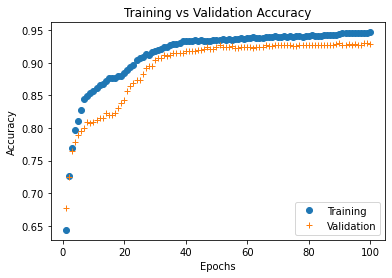

In [33]:
plt.plot(epochs, tra_acc, 'o', label='Training')
plt.plot(epochs, val_acc, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

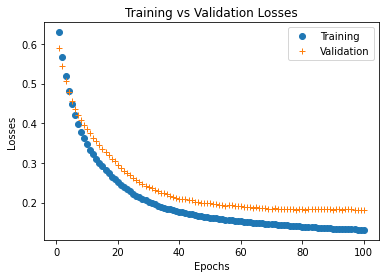

In [34]:
plt.plot(epochs, tra_loss, 'o', label='Training')
plt.plot(epochs, val_loss, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training vs Validation Losses')
plt.legend()
plt.show()

### <font color='Blue'>What Should you do ?</font>

Let us Experiment. You will guide me. Try a Different Architecture. Different Optimizer ?

### <font color='Blue'>1.10 Extracting Predicted Probabilities for Each Label </font>

In [35]:
test_df = pd.DataFrame(test_targets)
test_df.columns =['Act_Label_0', 'Act_Label_1', 'Act_Label_2']
test_df

,Act_Label_0,Act_Label_1,Act_Label_2
0,1,0,0
1,1,1,0
2,1,1,1
3,1,1,0
4,0,1,0
...,...,...,...
295,0,1,0
296,1,1,1
297,0,1,0
298,1,1,1


In [36]:
pred_probs = model.predict(test_data)
pred_probs = pd.DataFrame(pred_probs)
pred_probs.columns =['Prob_0', 'Prob_1', 'Prob_2']
pred_probs

,Prob_0,Prob_1,Prob_2
0,0.999998,0.002193,0.000028
1,0.996886,0.998973,0.003775
2,0.992502,0.995792,0.985264
3,0.963005,0.999193,0.782049
4,0.010476,0.999880,0.000023
...,...,...,...
295,0.633483,0.997352,0.405763
296,0.831279,0.883062,0.830399
297,0.022683,1.000000,0.000380
298,0.988614,0.993310,0.984694


In [37]:
y_pred_df = pd.concat([test_df, pred_probs], axis=1)
y_pred_df

,Act_Label_0,Act_Label_1,Act_Label_2,Prob_0,Prob_1,Prob_2
0,1,0,0,0.999998,0.002193,0.000028
1,1,1,0,0.996886,0.998973,0.003775
2,1,1,1,0.992502,0.995792,0.985264
3,1,1,0,0.963005,0.999193,0.782049
4,0,1,0,0.010476,0.999880,0.000023
...,...,...,...,...,...,...
295,0,1,0,0.633483,0.997352,0.405763
296,1,1,1,0.831279,0.883062,0.830399
297,0,1,0,0.022683,1.000000,0.000380
298,1,1,1,0.988614,0.993310,0.984694


### <font color='Blue'>1.11 Classifier Performance </font>

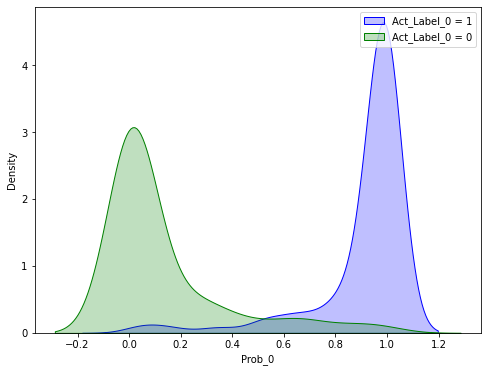

In [38]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.Act_Label_0 == 1]["Prob_0"], color = 'b', shade=True,label = 'Act_Label_0 = 1' )
sn.kdeplot( y_pred_df[y_pred_df.Act_Label_0 == 0]["Prob_0"], color = 'g', shade=True,label = 'Act_Label_0 = 0' )
plt.legend()
plt.show()

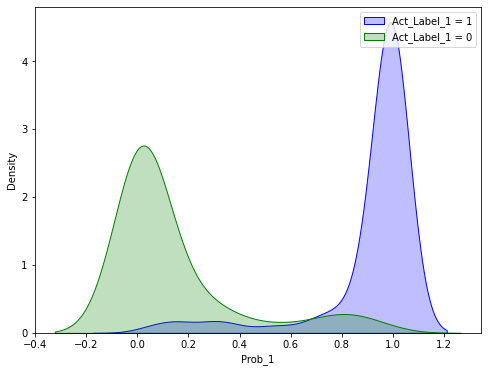

In [39]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.Act_Label_1 == 1]["Prob_1"], color = 'b', shade=True,label = 'Act_Label_1 = 1' )
sn.kdeplot( y_pred_df[y_pred_df.Act_Label_1 == 0]["Prob_1"], color = 'g', shade=True,label = 'Act_Label_1 = 0' )
plt.legend()
plt.show()

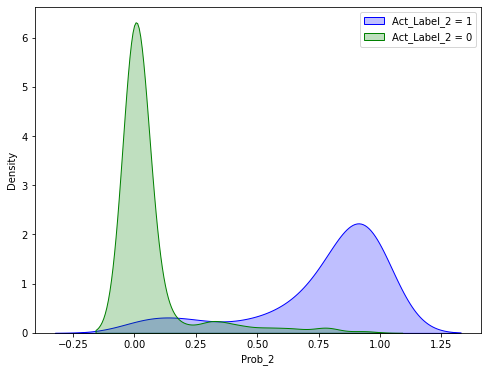

In [40]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.Act_Label_2 == 1]["Prob_2"], color = 'b', shade=True,label = 'Act_Label_2 = 1' )
sn.kdeplot( y_pred_df[y_pred_df.Act_Label_2 == 0]["Prob_2"], color = 'g', shade=True,label = 'Act_Label_2 = 0' )
plt.legend()
plt.show()

### <font color='Blue'>1.12 Performance Measures from Confusion Matrix </font>

#### <font color='Blue'>1.12 Get Predicted Labels Based on probability Distributions </font>

In [41]:
y_pred_df['Pred_label_0'] = y_pred_df.Prob_0.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df['Pred_label_1'] = y_pred_df.Prob_1.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df['Pred_label_2'] = y_pred_df.Prob_2.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df          

,Act_Label_0,Act_Label_1,Act_Label_2,Prob_0,Prob_1,Prob_2,Pred_label_0,Pred_label_1,Pred_label_2
0,1,0,0,0.999998,0.002193,0.000028,1,0,0
1,1,1,0,0.996886,0.998973,0.003775,1,1,0
2,1,1,1,0.992502,0.995792,0.985264,1,1,1
3,1,1,0,0.963005,0.999193,0.782049,1,1,1
4,0,1,0,0.010476,0.999880,0.000023,0,1,0
...,...,...,...,...,...,...,...,...,...
295,0,1,0,0.633483,0.997352,0.405763,1,1,0
296,1,1,1,0.831279,0.883062,0.830399,1,1,1
297,0,1,0,0.022683,1.000000,0.000380,0,1,0
298,1,1,1,0.988614,0.993310,0.984694,1,1,1


#### <font color='Blue'>1.12 Performance Measures from Confusion Matrix: Label_0 </font>

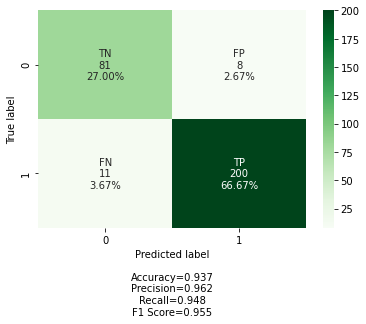

In [42]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.Act_Label_0, y_pred_df.Pred_label_0)
labels = ["TN","FP","FN","TP"]
categories = ["0","1"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

#### <font color='Blue'>1.12 Performance Measures from Confusion Matrix: Label_1 </font>

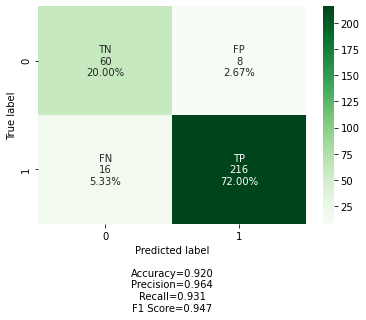

In [43]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.Act_Label_1, y_pred_df.Pred_label_1)
labels = ["TN","FP","FN","TP"]
categories = ["0","1"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

#### <font color='Blue'>1.12 Performance Measures from Confusion Matrix: Label_2 </font>

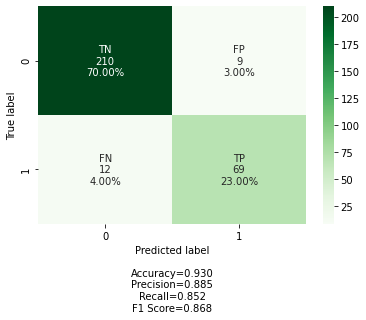

In [44]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.Act_Label_2, y_pred_df.Pred_label_2)
labels = ["TN","FP","FN","TP"]
categories = ["0","1"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

### <font color='Blue'>Conclusion</font>

Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.